In [1]:
#Clustering and Validation
#!pip install --upgrade "ipython[all]"
import pandas as pd
import numpy as np
from sklearn import cluster 
import matplotlib.pyplot as plt
%matplotlib inline 
import os
from pandas.compat import StringIO
os.getcwd()

'/Users/Wizard'

In [2]:
#df = pd.read_csv('GitHub/Kaggle/RussianReal_estate/test/train.csv')
df = pd.read_csv('GitHub/Myprojects/clustering/Test/HR.csv')

In [3]:
df_left = df[df.left==1]
df_sat = df[df.left==0]
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


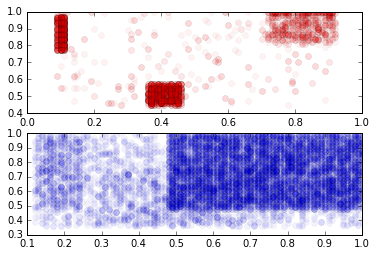

In [4]:
#scatter plot
plt.subplot(2,1,1)
plt.plot(df_left.satisfaction_level, df_left.last_evaluation, 'o', color= 'r', alpha=0.05)
plt.subplot(2,1,2)
plt.plot(df_sat.satisfaction_level, df_sat.last_evaluation, 'o', color= 'b', alpha=0.05)
plt.show()

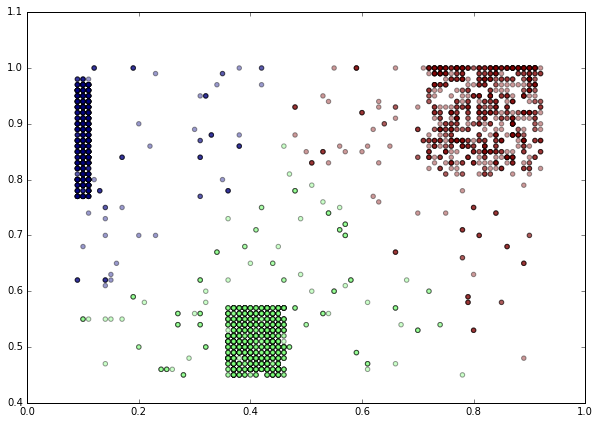

In [5]:
#clustering using K-Means
df_cleft=  df_left.drop([ u'number_project',u'average_montly_hours', u'time_spend_company', u'left',\
            u'Work_accident', u'promotion_last_5years', u'sales', u'salary'],axis = 1)
df_cleft.head()
df_cleft['label'] = cluster.KMeans(n_clusters=3, max_iter=300, algorithm='auto').fit(df_cleft).labels_
plt.figure(figsize= (10,7))
plt.scatter(df_cleft.satisfaction_level, df_cleft.last_evaluation, c=df_cleft.label, alpha=.4)

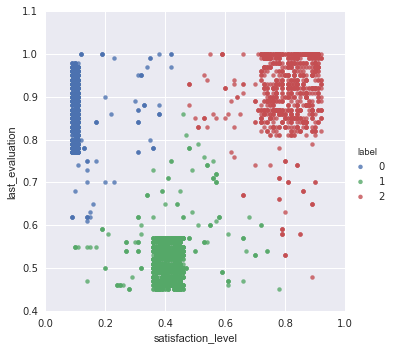

In [6]:
#plotting new clusters using sns library
import seaborn as sns
sns.lmplot('satisfaction_level', 'last_evaluation', data = df_cleft, hue='label', fit_reg=False)

In [7]:
df_hleft = df_left.drop([ u'number_project',u'average_montly_hours', u'time_spend_company', u'left',\
            u'Work_accident', u'promotion_last_5years', u'sales', u'salary'],axis = 1)
df_hleft.head()

,satisfaction_level,last_evaluation
0,0.38,0.53
1,0.80,0.86
2,0.11,0.88
3,0.72,0.87
4,0.37,0.52


In [ ]:
#estimator = cluster.FeatureAgglomeration(n_clusters=4)
#a = estimator.fit(df_hleft).labels_

In [8]:
#AffinityPropagation, #Time consuming high
estimator = cluster.AffinityPropagation()
df_hleft['label'] = estimator.fit(df_hleft).labels_
df_hleft.head()

,satisfaction_level,last_evaluation,label
0,0.38,0.53,0
1,0.80,0.86,1
2,0.11,0.88,2
3,0.72,0.87,1292
4,0.37,0.52,3


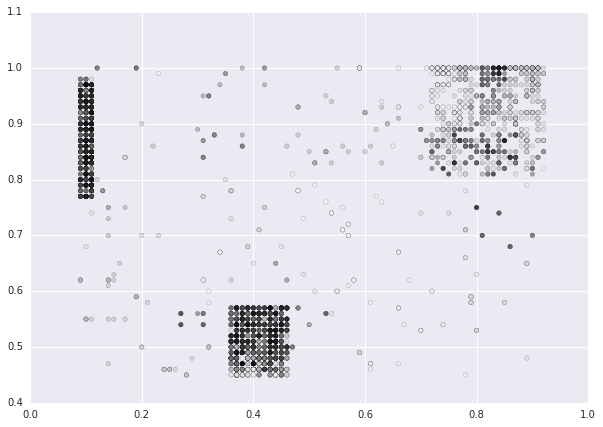

In [9]:
#plot
plt.figure(figsize= (10,7))
plt.scatter(df_hleft.satisfaction_level, df_hleft.last_evaluation, c=df_hleft.label, alpha=.4)

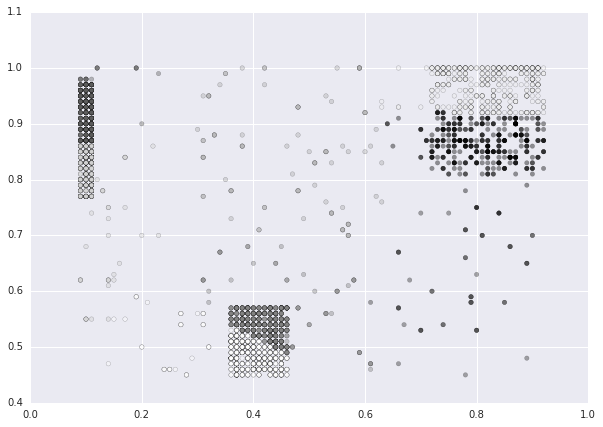

In [10]:
#MiniBatchKMeans
df_mleft=  df_left.drop([ u'number_project',u'average_montly_hours', u'time_spend_company', u'left',\
            u'Work_accident', u'promotion_last_5years', u'sales', u'salary'],axis = 1)
estimator = cluster.MiniBatchKMeans()
df_mleft['label'] = estimator.fit(df_mleft).labels_
df_mleft.head()
plt.figure(figsize= (10,7))
plt.scatter(df_mleft.satisfaction_level, df_mleft.last_evaluation, c=df_mleft.label, alpha=.4)

In [11]:
#Clustering Validation, 
#method1 Elbow -- Cdist method
import scipy
from scipy.spatial.distance import cdist
from sklearn import metrics
meandistortions = []
K = range(2,11)
for k in K:
    kmeans = cluster.KMeans(n_clusters=k, max_iter=300).fit(df_cleft)
    meandistortions.append(sum(np.min(cdist(df_cleft, kmeans.cluster_centers_, 'euclidean'), axis=1)))

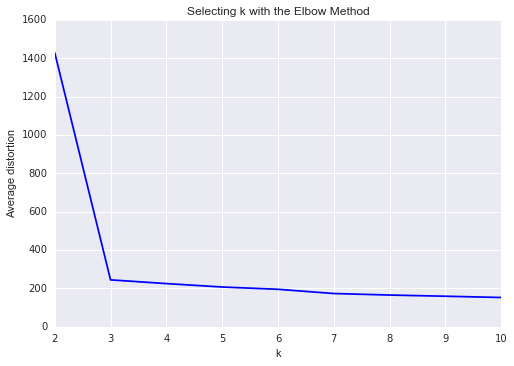

In [12]:
#Elbow plot, Kmeans
plt.plot(K, meandistortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Average distortion')
plt.title('Selecting k with the Elbow Method')
plt.show()

In [14]:
##Clustering Validation,Kmeans
#Method-2, Silhouette coefcient
silhoutte = []
for k in K:
    kmeans = cluster.KMeans(n_clusters=k, max_iter=300).fit(df_cleft)
    print kmeans.labels_
    silhoutte.append(metrics.silhouette_score(df_cleft, kmeans.labels_, metric='euclidean'))
    print silhoutte[k-2]

[0 1 0 ..., 0 0 0]
0.701942222726
[0 1 2 ..., 0 2 0]
0.912906910437
[1 0 2 ..., 1 2 1]
0.767671008342
[4 0 1 ..., 4 1 4]
0.493254039163
[2 0 3 ..., 2 3 2]
0.557135997453
[1 3 2 ..., 1 2 1]
0.558524400257
[4 3 2 ..., 4 2 4]
0.405064855549
[5 8 2 ..., 5 2 1]
0.402830712102
[0 1 2 ..., 0 2 4]
0.4154586475


In [13]:
#cluster validation scores, Kmeans, 
#method 3, calinski_harabaz_score, intra and inter clusters distance, higher score is better   
harabaz = []
for k in K:
    kmeans = cluster.KMeans(n_clusters=k, max_iter=300).fit(df_cleft)
    print kmeans.labels_
    harabaz.append(metrics.calinski_harabaz_score(df_cleft, kmeans.labels_))
    print harabaz[k-2]


[1 0 1 ..., 1 1 1]
7335.55963197
[1 0 2 ..., 1 2 1]
150729.646961
[1 3 0 ..., 1 0 1]
118065.938621
[1 3 2 ..., 1 2 1]
101648.961974
[5 1 2 ..., 5 2 5]
92507.2281605
[4 5 3 ..., 4 3 4]
89084.9022303
[7 4 5 ..., 7 5 7]
86857.4658267
[1 0 7 ..., 1 7 1]
86099.5588001
[4 0 5 ..., 4 5 4]
86108.6251218


In [ ]:
#useful links
#https://datascience.stackexchange.com/questions/6508/k-means-incoherent-behaviour-choosing-k-with-elbow-method-bic-variance-explain
#http://stackoverflow.com/questions/26139423/plot-different-color-for-different-categorical-levels-using-matplotlib

In [19]:
# harbaz and silhouette_score check on effinity and MiniBatchKMeans algo
estimator = cluster.MiniBatchKMeans().fit(df_cleft)
print metrics.calinski_harabaz_score(df_cleft, estimator.labels_)
print metrics.silhouette_score(df_cleft, estimator.labels_, metric='euclidean')
##how to incrase this score??

81390.095323
0.393381629597


In [ ]:
#other to do, validity criteria
#davies-bouldin-index
http://stackoverflow.com/questions/4919962/davies-bouldin-index
#dunn index
https://gist.github.com/douglasrizzo/cd7e792ff3a2dcaf27f6
#Gap statistics
https://gist.github.com/michiexile/5635273
#check later
http://etetoolkit.org/docs/2.3/tutorial/tutorial_clustering.html#cluster-validation-example
    